#### Data challenge 3 


You work for a data science consulting company. A major video game production company, has retained your firm to conduct market research into the video game industry. They've furnished you with video game sales data for the last thirty years (described below) and, as a first project, would like to know:

    What are some major differences between the North American, European, and Japanese video game markets?

    What video game genres are trending in each market?

    What features about a video game are most indicative of its success?


In [39]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [40]:
df.shape
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [41]:
df.info()
df.isnull().sum()
df = df.dropna()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

The year is type float, let's change it to int, look at the value counts of some of the columns, and eliminate the rows with missing data

In [42]:
df['Year'] = df['Year'].astype('int32')

In [43]:
df.Platform.value_counts()

DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

We can see that some platforms are very popular while others (few though) have less than 100 games on them.

In [44]:
df.describe(include='all')


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291,16291,16291.000000,16291,16291,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
unique,NaN,11325,31,NaN,12,576,NaN,NaN,NaN,NaN,NaN
top,NaN,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,2131,NaN,3251,1339,NaN,NaN,NaN,NaN,NaN
mean,8290.190228,NaN,NaN,2006.405561,NaN,NaN,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,NaN,NaN,5.832412,NaN,NaN,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.040000,0.480000


Let's explore the popularity of different genres and platforms with a few plots to visualize the data:

In [45]:
df.Genre.value_counts()

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

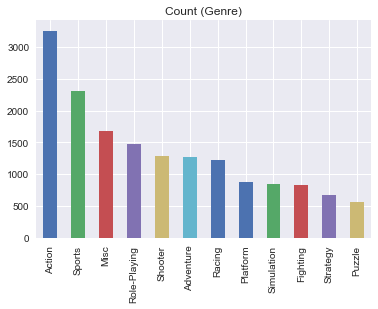

In [46]:
sns.set()
df['Genre'].value_counts().plot(kind='bar', title='Count (Genre)');

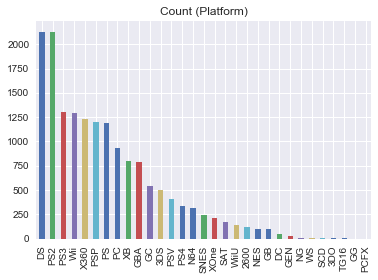

In [47]:
df['Platform'].value_counts().plot(kind='bar', title='Count (Platform)');

Is there a pattern to the release years for the games? Let's look at the number of games released each year:

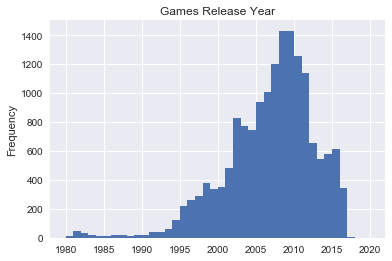

In [20]:
number_of_bins = int(df.Year.max() - df.Year.min())
title = "Games Release Year"

_=df["Year"].plot.hist(bins = number_of_bins, title=title)

It looks like most prolific years for game releases were 2005-2012, the overall distribution is skewed, but seems to have lowed down a bit past 2012.
Maybe we can get some insights looking at plots of sales numbers for each market:

Text(0.5,0,'Sales in Millions')

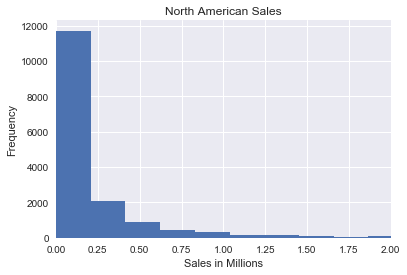

In [21]:
title="North American Sales"
df["NA_Sales"].plot.hist(bins=200, title=title, xlim=(0,2)).set_xlabel("Sales in Millions")

Text(0.5,0,'Sales in Millions')

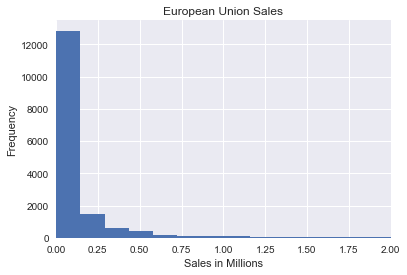

In [22]:
title="European Union Sales"
df["EU_Sales"].plot.hist(bins=200, title=title, xlim=(0,2)).set_xlabel("Sales in Millions")

Text(0.5,0,'Sales in Millions')

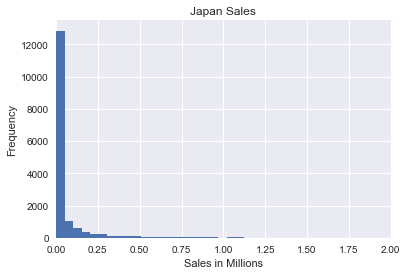

In [23]:
title="Japan Sales"
df["JP_Sales"].plot.hist(bins=200, title=title, xlim=(0,2)).set_xlabel("Sales in Millions")

One difference between sales on the three markets (first question) becomes apparent here: while North American and European sales have some games selling upwards of 500K units, the Japanese market is a lot smaller, with barely any games selling more than 250K units.

Text(0.5,0,'Sales in Millions')

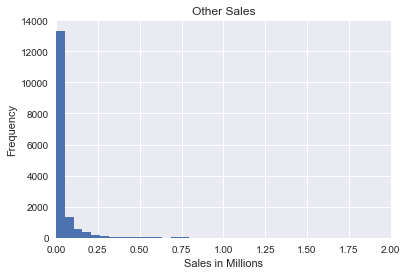

In [24]:
title="Other Sales"
df["Other_Sales"].plot.hist(bins=200, title=title, xlim=(0,2)).set_xlabel("Sales in Millions")

Text(0.5,0,'Sales in Millions')

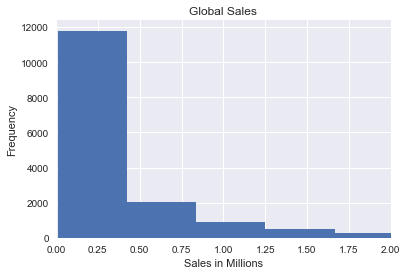

In [25]:
title="Global Sales"
df["Global_Sales"].plot.hist(bins=200, title=title, xlim=(0,2)).set_xlabel("Sales in Millions")

Since we found a difference in sales between our markets let's take a look at sales by year, to see if that shows anything interesting:

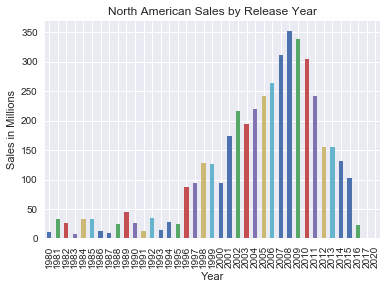

In [26]:
title = "North American Sales by Release Year"
_=df.groupby("Year").sum()["NA_Sales"].plot.bar(title=title).set_ylabel("Sales in Millions")


Since the North America sales are the largest, let's restrict the y-axis limits for the subsequent plots to keep them comparable.

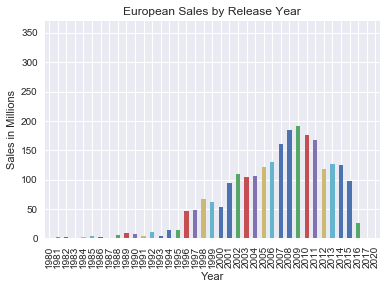

In [27]:
title = "European Sales by Release Year"
_=df.groupby("Year").sum()["EU_Sales"].plot.bar(title=title).set_ylabel("Sales in Millions")
_=plt.ylim(0,370)

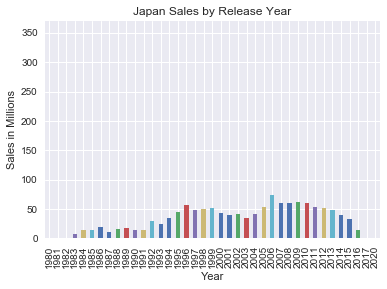

In [28]:
title = "Japan Sales by Release Year"
_=df.groupby("Year").sum()["JP_Sales"].plot.bar(title=title).set_ylabel("Sales in Millions")
_=plt.ylim(0,370)

What video game genres are trending in each market?

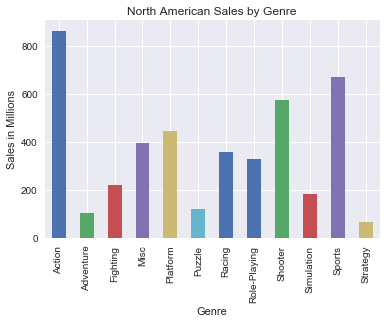

In [29]:
title = "North American Sales by Genre"
_=df.groupby("Genre").sum()["NA_Sales"].plot.bar(title=title).set_ylabel("Sales in Millions")

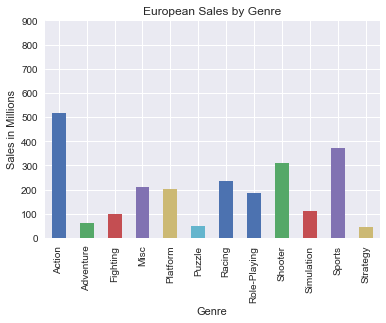

In [30]:
title = "European Sales by Genre"
_=df.groupby("Genre").sum()["EU_Sales"].plot.bar(title=title).set_ylabel("Sales in Millions")
_=plt.ylim(0,900)

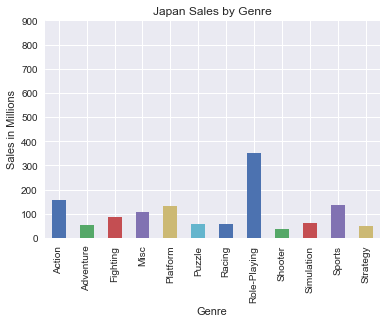

In [31]:
title = "Japan Sales by Genre"
_=df.groupby("Genre").sum()["JP_Sales"].plot.bar(title=title).set_ylabel("Sales in Millions")
_=plt.ylim(0,900)

This means that while Action, Sports and Shooter games are most popular in North America and Europe, Japanese comsumers prefer Role Playing games.

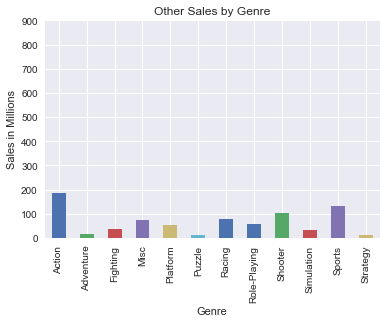

In [32]:
title = "Other Sales by Genre"
_=df.groupby("Genre").sum()["Other_Sales"].plot.bar(title=title).set_ylabel("Sales in Millions")
_=plt.ylim(0,900)

### Moving to the last question, about features for games that would predict their success (rank? Sales?)

In [48]:
df = df.drop(['Name', 'Publisher', 'Platform'], axis =1)
df = pd.get_dummies(df)
df.head()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,1,2006,41.49,29.02,3.77,8.46,82.74,0,0,0,0,0,0,0,0,0,0,1,0
1,2,1985,29.08,3.58,6.81,0.77,40.24,0,0,0,0,1,0,0,0,0,0,0,0
2,3,2008,15.85,12.88,3.79,3.31,35.82,0,0,0,0,0,0,1,0,0,0,0,0
3,4,2009,15.75,11.01,3.28,2.96,33.00,0,0,0,0,0,0,0,0,0,0,1,0
4,5,1996,11.27,8.89,10.22,1.00,31.37,0,0,0,0,0,0,0,1,0,0,0,0


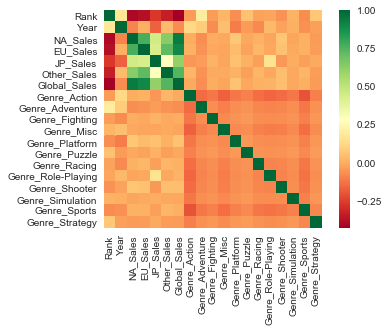

In [56]:
_ = sns.heatmap(df.corr(), square=True, cmap = 'RdYlGn')

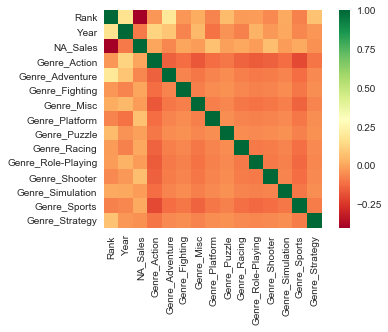

In [50]:
df_NA = df.drop(['EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],axis=1)
_ = sns.heatmap(df_NA.corr(), square=True, cmap = 'RdYlGn')

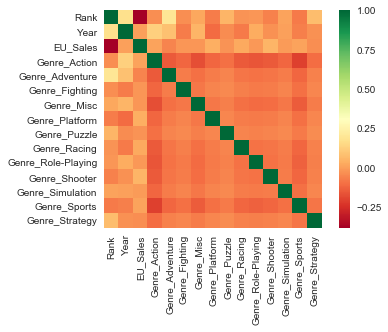

In [51]:
df_EU = df.drop(['NA_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],axis=1)
_ = sns.heatmap(df_EU.corr(), square=True, cmap = 'RdYlGn')

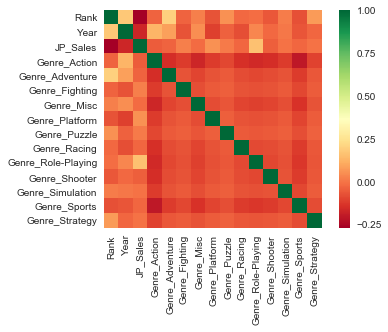

In [52]:
df_JP = df.drop(['EU_Sales', 'NA_Sales', 'Other_Sales', 'Global_Sales'],axis=1)
_ = sns.heatmap(df_JP.corr(), square=True, cmap = 'RdYlGn')

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from statsmodels.tools import categorical

X = df.drop(['Global_Sales'], axis = 1)
y = df['Global_Sales']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train.shape


(13032, 18)

In [72]:
n_features = X_train.shape[1]
rfr = RandomForestRegressor(max_depth=2, random_state=42,
                             n_estimators=100,
                            max_features=n_features//3)
rfr.fit(X_train, y_train)

feature_importances = pd.DataFrame(rfr.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances

,importance
Rank,0.396706
NA_Sales,0.284780
EU_Sales,0.163760
Other_Sales,0.092637
JP_Sales,0.048432
Year,0.010645
Genre_Platform,0.001951
Genre_Puzzle,0.000476
Genre_Adventure,0.000341
Genre_Misc,0.000135


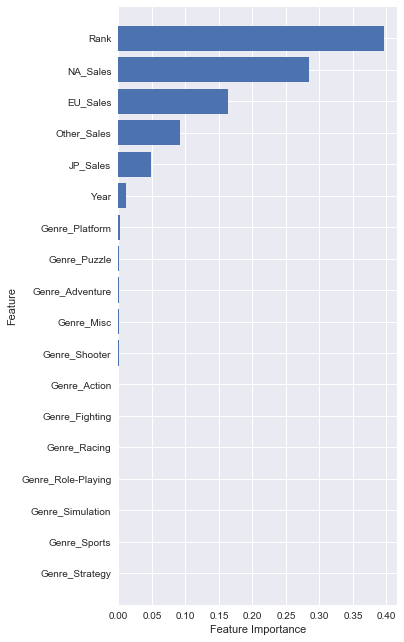

In [73]:
plt.figure(figsize=(5,11))
plt.barh(range(n_features), feature_importances['importance'], align = 'center')
plt.yticks(np.arange(n_features), list(feature_importances.index))
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)
plt.gca().invert_yaxis()
plt.show()
